In [1]:
import ROOT
import glob, os

Welcome to JupyROOT 6.14/02


In [2]:
fileList = []
for root, dirs, files in os.walk("/Users/Deshan/Desktop/Dilepton/scripts/output_condor/"):
    for file in files:
        if file.endswith("reco_log.root"):
            fileList.append(os.path.join(root,file))

In [3]:
print fileList

['/Users/Deshan/Desktop/Dilepton/scripts/output_condor/output_RRp_mu/output_DY_Pythia_mu_reco_log.root', '/Users/Deshan/Desktop/Dilepton/scripts/output_condor/output_LRp_el/output_DY_Pythia_el_reco_log.root', '/Users/Deshan/Desktop/Dilepton/scripts/output_condor/output_LRm_el/output_DY_Pythia_el_reco_log.root', '/Users/Deshan/Desktop/Dilepton/scripts/output_condor/output_RRm_mu/output_DY_Pythia_mu_reco_log.root', '/Users/Deshan/Desktop/Dilepton/scripts/output_condor/output_RRm_el/output_DY_Pythia_el_reco_log.root', '/Users/Deshan/Desktop/Dilepton/scripts/output_condor/output_LRm_mu/output_DY_Pythia_mu_reco_log.root', '/Users/Deshan/Desktop/Dilepton/scripts/output_condor/output_LRp_mu/output_DY_Pythia_mu_reco_log.root', '/Users/Deshan/Desktop/Dilepton/scripts/output_condor/output_RRp_el/output_DY_Pythia_el_reco_log.root', '/Users/Deshan/Desktop/Dilepton/scripts/output_condor/output_RLm_el/output_DY_Pythia_el_reco_log.root', '/Users/Deshan/Desktop/Dilepton/scripts/output_condor/output_LL

In [4]:
for file in fileList:
    print file
    if "el" in file: channel = "ee"
    else: channel = "mm"
    
    if "LLm" in file: 
        model = "LL"
        chirality = "const"
    elif "LLp" in file: 
        model = "LL"
        chirality = "dest"
    elif "LRm" in file: 
        model = "LR"
        chirality = "const"
    elif "LRp" in file: 
        model = "LR"
        chirality = "dest"
    elif "RLm" in file: 
        model = "RL"
        chirality = "const"
    elif "RLp" in file: 
        model = "RL"
        chirality = "dest"
    elif "RRm" in file: 
        model = "RR"
        chirality = "const"
    elif "RRp" in file: 
        model = "RR"
        chirality = "dest"
    
    n = "output/"+channel+"/CI_Template_"+model+"_log.root"
    if os.path.exists(n): newFile = ROOT.TFile(n,"UPDATE")
    else: newFile = ROOT.TFile(n,"RECREATE")
#     if chirality == "const": 
#     else: newFile = ROOT.TFile(n,"RECREATE")

    rootFile = ROOT.TFile(file)
    if channel == "ee": nomDY = rootFile.Get("h_InvMass_DY_Pythia_el_reco_log")
    else: nomDY = rootFile.Get("h_InvMass_DY_Pythia_mu_reco_log")
#     nomDY.Rebin(100)
    for key in rootFile.GetListOfKeys():
        h = key.ReadObj()
#         h.Rebin(100)
        name = h.GetName().split("_")
        if "CI" in name[1]:
            h.Add(nomDY,-1)
            h.SetName("diff_CI_"+model+"_"+chirality+"_"+str(int(name[3])/1000)+"_TeV")
            newFile.cd()
            print h.GetName()

            h.Write()
    
    newFile.Close()
            
        


/Users/Deshan/Desktop/Dilepton/scripts/output_condor/output_RRp_mu/output_DY_Pythia_mu_reco_log.root
diff_CI_RR_dest_12_TeV
diff_CI_RR_dest_14_TeV
diff_CI_RR_dest_16_TeV
diff_CI_RR_dest_18_TeV
diff_CI_RR_dest_20_TeV
diff_CI_RR_dest_22_TeV
diff_CI_RR_dest_24_TeV
diff_CI_RR_dest_26_TeV
diff_CI_RR_dest_28_TeV
diff_CI_RR_dest_30_TeV
diff_CI_RR_dest_32_TeV
diff_CI_RR_dest_34_TeV
diff_CI_RR_dest_36_TeV
diff_CI_RR_dest_38_TeV
diff_CI_RR_dest_40_TeV
diff_CI_RR_dest_42_TeV
diff_CI_RR_dest_44_TeV
diff_CI_RR_dest_46_TeV
diff_CI_RR_dest_48_TeV
diff_CI_RR_dest_50_TeV
diff_CI_RR_dest_52_TeV
diff_CI_RR_dest_54_TeV
diff_CI_RR_dest_56_TeV
diff_CI_RR_dest_58_TeV
diff_CI_RR_dest_60_TeV
diff_CI_RR_dest_62_TeV
diff_CI_RR_dest_64_TeV
diff_CI_RR_dest_66_TeV
diff_CI_RR_dest_68_TeV
diff_CI_RR_dest_70_TeV
diff_CI_RR_dest_72_TeV
diff_CI_RR_dest_74_TeV
diff_CI_RR_dest_76_TeV
diff_CI_RR_dest_78_TeV
diff_CI_RR_dest_80_TeV
diff_CI_RR_dest_82_TeV
diff_CI_RR_dest_84_TeV
diff_CI_RR_dest_86_TeV
diff_CI_RR_dest_88_TeV
di

In [5]:
f = ROOT.TFile("output/ee/CI_Template_LL.root")
f2= ROOT.TFile("/Users/Deshan/Desktop/Dilepton/pyStap0l8ate/data/ci/templates_r21_mm_new/CI_Template_LL.root")

In [6]:
h = f.Get("diff_CI_LL_const_12_TeV")
h2 = f2.Get("diff_CI_LL_const_12_TeV")

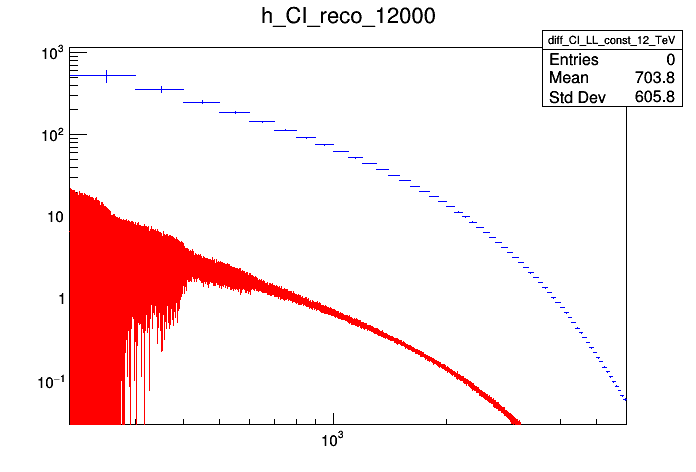

In [7]:
c = ROOT.TCanvas()
h.GetXaxis().SetRangeUser(200,6000)
h.SetMarkerColor(4)
h.SetLineColor(4)
h.Draw()
h2.SetMarkerColor(2)
h2.SetLineColor(2)
h2.Draw("same")
# fakes.SetMarkerColor(4)
# fakes.Draw("same")
c.SetLogy()
c.SetLogx()

c.Draw()